### 1. Conozca al Dr. Ignaz Semmelweis

Este es el Dr. Ignaz Semmelweis, médico húngaro nacido en 1818 y activo en el Hospital General de Viena. Si el Dr. Semmelweis parece preocupado es probablemente porque está pensando en la fiebre del parto: Una enfermedad mortal que afecta a las mujeres que acaban de dar a luz. Está pensando en ella porque a principios de la década de 1840 en el Hospital General de Viena hasta el 10% de las mujeres que daban a luz morían a causa de ella. Lo piensa porque conoce la causa de la fiebre del parto: las manos contaminadas de los médicos que atienden los partos. Y no le hacen caso y se lavan las manos.

En este cuaderno, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia del lavado de manos. Empecemos por ver los datos que hicieron que Semmelweis se diera cuenta de que algo iba mal en los procedimientos del Hospital General de Viena.

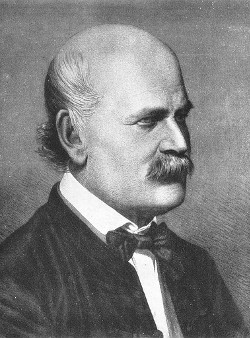

In [2]:
# Importación de módulos
import pandas as pd

# Leer datasets/yearly_deaths_by_clinic.csv en yearly
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')

# Imprimir yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


### 2. El alarmante número de muertes

La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Se puede observar que dar a luz era muy peligroso; un número alarmante de mujeres morían a consecuencia del parto, la mayoría de ellas por fiebre de parto.

Lo vemos más claramente si observamos la proporción de muertes respecto al número de mujeres que dan a luz. Veamos la proporción de muertes en la Clínica 1.

In [3]:
# Calcular la proporción de muertes por número de nacimientos
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extraer los datos de la clínica 1 en clinic_1 y los de la clínica 2 en clinic_2
clinic_1 = yearly[yearly['clinic'] == "clinic 1"]
clinic_2 = yearly[yearly['clinic'] == "clinic 2"]

# Imprimir la clínica_2
print(clinic_2)

    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


### 3. Muerte en las clínicas

Si ahora trazamos la proporción de muertes en la Clínica 1 y en la Clínica 2 veremos un curioso patrón...

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

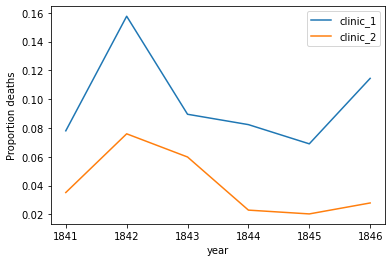

In [12]:
# Esto hace que las parcelas aparezcan en el cuaderno
%matplotlib inline

# Traza la proporción anual de muertes en las dos clínicas
ax = clinic_1.plot(x = "year", y = "proportion_deaths", label = "clinic_1")
clinic_2.plot(x = "year", y = "proportion_deaths", label = "clinic_2", ax = ax, ylabel="Proportion deaths")

### 4. Comienza el lavado de manos

¿Por qué la proporción de muertes es sistemáticamente mucho mayor en la Clínica 1? Semmelweis vio el mismo patrón y se quedó perplejo y angustiado. La única diferencia entre las clínicas era que muchos estudiantes de medicina atendían en la Clínica 1, mientras que la mayoría de los estudiantes de partería atendían en la Clínica 2. Mientras que las matronas sólo atendían a las mujeres que daban a luz, los estudiantes de medicina también pasaban tiempo en las salas de autopsias examinando los cadáveres.

Semmelweis empezó a sospechar que algo en los cadáveres, propagado por las manos de los estudiantes de medicina, causaba la fiebre del parto. Así que, en un intento desesperado por detener las altas tasas de mortalidad, decretó: ¡Lávate las manos! Esta fue una petición poco ortodoxa y controvertida, nadie en Viena conocía las bacterias en ese momento.

Vamos a cargar los datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.

In [15]:
# Leer datasets/monthly_deaths.csv en monthly
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=["date"])

# Calcular la proporción de muertes por número de nacimientos
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

# Imprimir las primeras filas en monthly
print(monthly.head(10))

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843
5 1841-06-01     200      10           0.050000
6 1841-07-01     190      16           0.084211
7 1841-08-01     222       3           0.013514
8 1841-09-01     213       4           0.018779
9 1841-10-01     236      26           0.110169


### 5. El efecto del lavado de manos

Una vez cargados los datos, podemos observar la proporción de muertes a lo largo del tiempo. En el siguiente gráfico no hemos marcado el punto en el que comenzó el lavado de manos obligatorio, pero redujo la proporción de muertes hasta tal punto que debería ser capaz de distinguirlo.

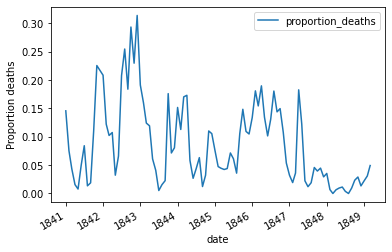

In [14]:
# Trazar la proporción mensual de muertes
ax = monthly.plot(x = "date", y = "proportion_deaths", ylabel = "Proportion deaths")

### 6. El efecto del lavado de manos destacado

A partir del verano de 1847 la proporción de muertes se reduce drásticamente y, sí, fue cuando Semmelweis hizo obligatorio el lavado de manos.

El efecto del lavado de manos queda aún más claro si lo resaltamos en el gráfico.

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

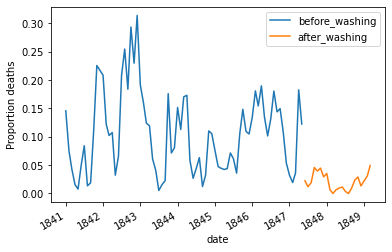

In [16]:
# Fecha en la que se hizo obligatorio el lavado de manos
handwashing_start = pd.to_datetime('1847-06-01')

# Dividido mensualmente en antes y después de empezar a lavarse las manos
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Representar la proporción mensual de muertes antes y después de lavarse las manos
ax = before_washing.plot(x = "date", y = "proportion_deaths", label = "before_washing")
after_washing.plot(x = "date", y = "proportion_deaths", label = "after_washing", ax = ax, ylabel="Proportion deaths")

### 7. ¿Más lavado de manos, menos muertes?

De nuevo, el gráfico muestra que el lavado de manos tuvo un gran efecto. ¿Cuánto redujo la proporción mensual de muertes en promedio?

In [17]:
# Diferencia en la proporción media mensual de muertes debidas al lavado de manos
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff =  after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

### 8. Un análisis Bootstrap de los datos de lavado de manos de Semmelweis

Redujo la proporción de muertes en unos 8 puntos porcentuales. Del 10% de media a sólo el 2% (que sigue siendo una cifra elevada para los estándares modernos).

Para tener una idea de la incertidumbre en torno a cuánto reduce el lavado de manos la mortalidad, podríamos observar un intervalo de confianza (aquí calculado mediante el método bootstrap).

In [18]:
# Un análisis bootstrap de la reducción de las muertes debidas al lavado de manos
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Cálculo de un intervalo de confianza del 95% a partir de boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101274
0.975   -0.067229
dtype: float64

### 9. El destino del Dr. Semmelweis

Así, el lavado de manos redujo la proporción de muertes entre 6,7 y 10 puntos porcentuales, según un intervalo de confianza del 95%. En definitiva, parece que Semmelweis tenía pruebas sólidas de que el lavado de manos era un procedimiento sencillo pero muy eficaz que podía salvar muchas vidas.

La tragedia es que, a pesar de las pruebas, la teoría de Semmelweis -que la fiebre de los niños estaba causada por alguna "sustancia" (lo que hoy conocemos como bacterias) procedente de los cadáveres de las salas de autopsia- fue ridiculizada por los científicos contemporáneos. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar definitivamente el Hospital General de Viena.

Uno de los motivos fue que la estadística y los argumentos estadísticos eran poco comunes en la ciencia médica del siglo XIX. Semmelweis sólo publicó sus datos en forma de largas tablas de datos brutos, pero no mostró ningún gráfico ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de reunir, podría haber tenido más éxito en conseguir que los médicos vieneses se lavaran las manos.

In [19]:
# Los datos recogidos por Semmelweis apuntan a ello:
doctors_should_wash_their_hands = False